# EECS 731 Project 1: Jimmy Wrangler, Data Explorer

In this project, I will be reading and combining datasets on statistics for U.S. states (including the District of Columbia). In particular, I'll be looking at data for state populations, urbanization indexes and vehicular accidents to see if either of the first two correlate with the last one.

For reference the following datasets are used:
- [Population, Population Change, and Estimated Components of Population Change: April 1, 2010 to July 1, 2019](http://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv)
- [urbanization-index](https://github.com/fivethirtyeight/data/blob/master/urbanization-index/urbanization-state.csv)
- [bad-drivers](https://github.com/fivethirtyeight/data/blob/master/bad-drivers/bad-drivers.csv)

Each dataset can also be found in the data/raw/ directory.

## Python Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Reading the Datasets
### State Populations

In [2]:
state_populations = pd.read_csv("../data/raw/nst-est2019-alldata.csv")
state_populations = state_populations.loc[5:55,("NAME","POPESTIMATE2012")]

For this dataset, the column headers need to be renamed (for dataset merging) and the populations values need to be scaled down (for plotting purposes). In this case, I scale them down by a factor of 1 million.

In [3]:
state_populations = state_populations.rename(columns={"NAME":"state", "POPESTIMATE2012":"population"})
state_populations.loc[:,"population"] /= 1000000
state_populations

,state,population
5,Alabama,4.815588
6,Alaska,0.730443
7,Arizona,6.554978
8,Arkansas,2.952164
9,California,37.948800
10,Colorado,5.192647
11,Connecticut,3.594547
12,Delaware,0.915179
13,District of Columbia,0.634924
14,Florida,19.297822


### State Urbanization Indexes

In [4]:
state_urbanizations = pd.read_csv("../data/raw/urbanization-state.csv")

This dataset includes indexes for additional locations (Guam, Puerto Rico, etc.). However, we aren't concerned with those values so we remove them.

In [5]:
state_urbanizations = state_urbanizations.drop([2,12,37,42])
state_urbanizations

,state,urbanindex
0,Alabama,9.605935
1,Alaska,8.735964
3,Arizona,11.299710
4,Arkansas,9.259444
5,California,12.190280
6,Colorado,11.154450
7,Connecticut,11.409680
8,Delaware,11.009990
9,District of Columbia,13.440570
10,Florida,11.464840


### State Total Vehicular Accidents

In [6]:
state_accidents = pd.read_csv("../data/raw/bad-drivers.csv")
state_accidents = state_accidents.loc[:,("State", "Number of drivers involved in fatal collisions per billion miles")]

Like the population dataset, this dataset also needs the columns to be renamed.

In [7]:
state_accidents = state_accidents.rename(columns={"State":"state", "Number of drivers involved in fatal collisions per billion miles":"accidents"})
state_accidents

,state,accidents
0,Alabama,18.8
1,Alaska,18.1
2,Arizona,18.6
3,Arkansas,22.4
4,California,12.0
5,Colorado,13.6
6,Connecticut,10.8
7,Delaware,16.2
8,District of Columbia,5.9
9,Florida,17.9


## Combining the Datasets
In total, I create two merged datasets in order to test whether total state accidents correlate to either population or urbanization index.
### Population vs. Accidents

In [8]:
population_vs_accidents = pd.merge(state_populations, state_accidents, on="state")

In this case, I sort the dataset based on the 'population' column and save it to the data/processed/ directory.

In [9]:
population_vs_accidents = population_vs_accidents.sort_values(by="population")
population_vs_accidents.to_csv("../data/processed/population_vs_accidents.csv")
population_vs_accidents

,state,population,accidents
50,Wyoming,0.576305,17.4
45,Vermont,0.626090,13.6
8,District of Columbia,0.634924,5.9
34,North Dakota,0.701176,23.9
1,Alaska,0.730443,18.1
41,South Dakota,0.833566,19.4
7,Delaware,0.915179,16.2
26,Montana,1.003783,21.4
39,Rhode Island,1.054621,11.1
29,New Hampshire,1.324232,11.6


### Urbanization Index vs. Accidents

In [10]:
urbanindex_vs_accidents = pd.merge(state_urbanizations, state_accidents, on="state")

In this case, I sort the dataset based on the 'urbanindex' column and save it to the data/processed/ directory.

In [11]:
urbanindex_vs_accidents = urbanindex_vs_accidents.sort_values(by="urbanindex")
urbanindex_vs_accidents.to_csv("../data/processed/urbanindex_vs_accidents.csv")
urbanindex_vs_accidents

,state,urbanindex,accidents
50,Wyoming,8.256294,17.4
26,Montana,8.470226,21.4
41,South Dakota,8.728642,19.4
1,Alaska,8.735964,18.1
45,Vermont,8.843222,13.6
24,Mississippi,8.910859,17.6
19,Maine,9.037091,15.1
34,North Dakota,9.054678,23.9
48,West Virginia,9.111112,23.8
3,Arkansas,9.259444,22.4


## Plotting the Combined Datasets
For both datasets, since the number of states is constant (51 including D.C.), I use a constant range for the x-axis values. Also, I setup a pair of Pyplot subgraphs to visualize both datasets side-by-side.

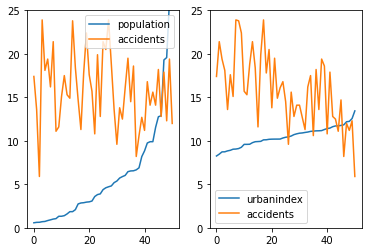

In [15]:
graph_range = range(51)
_,graphs = plt.subplots(1,2)

# Population vs Accidents
graphs[0].plot(graph_range, 'population', data=population_vs_accidents)
graphs[0].plot(graph_range, 'accidents', data=population_vs_accidents)
graphs[0].set_ylim([0,25])
graphs[0].legend()

# Urbanization vs Accidents
graphs[1].plot(graph_range, 'urbanindex', data=urbanindex_vs_accidents)
graphs[1].plot(graph_range, 'accidents', data=urbanindex_vs_accidents)
graphs[1].set_ylim([0,25])
graphs[1].legend()

## Results
As can be seen in both graphs, as the population size and urbanization index increase, respectively, the total number of vehicular accidents varies considerably. As such, it's evident that there isn't a correlation between either a state's population or urbanization index and its total number of vehicular accidents.